# Creates Heatmap of Anode Voltage, Act. Pressure, and Tube Counts for both LGM and RGM Over All Param Space

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl

## Loading Data

In [2]:
#directory which contains the scans
directory = 'GMTubeScans'

#columns for the dataframes
cols = ['Anode', 'Pressure', 'Counts']

#dataframes for L and R tubes
LGMOn = pd.DataFrame(columns=cols)
LGMOff = pd.DataFrame(columns=cols)

RGMOn = pd.DataFrame(columns=cols)
RGMOff = pd.DataFrame(columns=cols)

for filename in os.listdir(directory):
    filename = directory+'/'+filename
    
    # left tube
    
    pressure = []
    countsOn = []
    countsOff = []
    countsOnNorm = []
    countsOffNorm = []
    voltage = []
    current = []

    Ldata = pd.read_csv(filename, usecols=([6, 25, 28, 30]), header=6, delimiter='\t')
    Ldata = Ldata.sort_values(by='en')

    for i in range(len(Ldata)):
        if int(Ldata['en'][i]) == 0:
            countsOff.append(int(Ldata['gm1'][i]))
        else:
            countsOn.append(int(Ldata['gm1'][i]))
            current.append(abs(1.0e6*float(Ldata['6487c'][i])))
            voltage.append(Ldata['vb'][i])

    for i in range(len(countsOn)):
        if float(filename[12:16]) < 3.82:
            countsOnNorm.append((countsOn[i])/30) # if scan lasted 30s
            countsOffNorm.append((countsOff[i])/30)
        elif 3.82 <= float(filename[12:16]) < 4.8:
            countsOnNorm.append((countsOn[i])/15) # if scan lasted 15s
            countsOffNorm.append((countsOff[i])/15)
        else:
            countsOnNorm.append((countsOn[i])/5) # if scan lasted 5s
            countsOffNorm.append((countsOff[i])/5)

    for i in range(len(countsOnNorm)):
        pressure.append(float(filename[12:16]))

    LfinalOn = pd.DataFrame(data=list(zip(voltage, pressure, countsOnNorm)), columns=cols)
    LGMOn = pd.concat((LGMOn, LfinalOn), ignore_index=True)

    LfinalOff = pd.DataFrame(data=list(zip(voltage, pressure, countsOffNorm)), columns=cols)
    LGMOff = pd.concat((LGMOff, LfinalOff), ignore_index=True)

    # right tube

    pressure = []
    countsOn = []
    countsOff = []
    countsOnNorm = []
    countsOffNorm = []
    voltage = []
    current = []

    Rdata = pd.read_csv(filename, usecols=([6, 24, 27, 30]), header=6, delimiter='\t')
    Rdata = Rdata.sort_values(by='en')

    for i in range(len(Rdata)):
        if int(Rdata['en'][i]) == 0:
            countsOff.append(int(Rdata['gm2'][i]))
        else:
            countsOn.append(int(Rdata['gm2'][i]))
            current.append(abs(1.0e6*float(Rdata['6487c'][i])))
            voltage.append(Rdata['va'][i])

    for i in range(len(countsOn)):
        if float(filename[12:16]) < 3.82:
            countsOnNorm.append((countsOn[i])/30) # if scan lasted 30s
            countsOffNorm.append((countsOff[i])/30)
        elif 3.82 <= float(filename[12:16]) < 4.8:
            countsOnNorm.append((countsOn[i])/15) # if scan lasted 15s
            countsOffNorm.append((countsOff[i])/15)
        else:
            countsOnNorm.append((countsOn[i])/5) # if scan lasted 5s
            countsOffNorm.append((countsOff[i])/5)

    for i in range(len(countsOnNorm)):
        pressure.append(float(filename[12:16]))

    RfinalOn = pd.DataFrame(data=list(zip(voltage, pressure, countsOnNorm)), columns=cols)
    RGMOn = pd.concat((RGMOn, RfinalOn), ignore_index=True)

    RfinalOff = pd.DataFrame(data=list(zip(voltage, pressure, countsOffNorm)), columns=cols)
    RGMOff = pd.concat((RGMOff, RfinalOff), ignore_index=True)

## Plotting Heatmaps (Gun On)

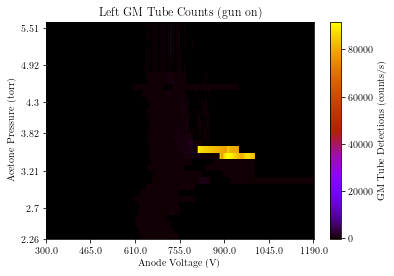

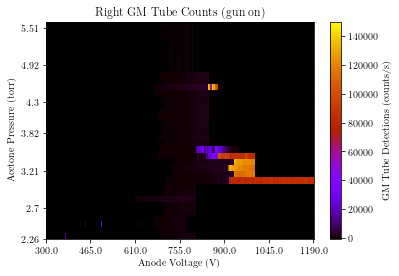

In [3]:
# left tube

LGMPlotOn = pd.DataFrame(columns=np.unique(LGMOn['Anode']), index=np.unique(LGMOn['Pressure'])) # reshapes the data in order to create a heatmap

for i in range(len(LGMOn['Pressure'])):
    LGMPlotOn.loc[LGMOn['Pressure'][i], LGMOn['Anode'][i]] = float(LGMOn['Counts'][i])

LGMPlotOn = LGMPlotOn.fillna(0.)

fig1, ax1 = plt.subplots()
ax1.pcolormesh(LGMPlotOn, cmap='gnuplot', vmin=-1/256*max(LGMOn['Counts']), vmax=max(LGMOn['Counts']))

ax1.yaxis.set_ticks(np.linspace(0, len(LGMPlotOn.index)-1, 7, dtype='int'))
ylabels = []
for i in np.linspace(0, len(LGMPlotOn.index)-1, 7, dtype='int'):
    ylabels.append(LGMPlotOn.index[i])
ax1.yaxis.set_ticklabels(ylabels)
ax1.set_ylabel('Acetone Pressure (torr)')

ax1.xaxis.set_ticks(np.linspace(0, len(LGMPlotOn.columns)-1, 7, dtype='int'))
xlabels = []
for i in np.linspace(0, len(LGMPlotOn.columns)-1, 7, dtype='int'):
    xlabels.append(LGMPlotOn.columns[i])
ax1.xaxis.set_ticklabels(xlabels)
ax1.set_xlabel('Anode Voltage (V)')

ax1.set_title('Left GM Tube Counts (gun on)')

cbar1 = fig1.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=-1/256*max(LGMOn['Counts']), vmax=max(LGMOn['Counts'])), cmap='gnuplot'))
cbar1.set_label('GM Tube Detections (counts/s)')
fig1.savefig('Plots/LGMGunOn.jpg', dpi=500)
plt.show()

# right tube

RGMPlotOn = pd.DataFrame(columns=np.unique(RGMOn['Anode']), index=np.unique(RGMOn['Pressure'])) # reshapes the data in order to create a heatmap

for i in range(len(RGMOn['Pressure'])):
    RGMPlotOn.loc[RGMOn['Pressure'][i], RGMOn['Anode'][i]] = float(RGMOn['Counts'][i])

RGMPlotOn = RGMPlotOn.fillna(0.)

fig2, ax2 = plt.subplots()
ax2.pcolormesh(RGMPlotOn, cmap='gnuplot', vmin=-1/256*max(RGMOn['Counts']), vmax=max(RGMOn['Counts']))

ax2.yaxis.set_ticks(np.linspace(0, len(RGMPlotOn.index)-1, 7, dtype='int'))
ylabels = []
for i in np.linspace(0, len(RGMPlotOn.index)-1, 7, dtype='int'):
    ylabels.append(RGMPlotOn.index[i])
ax2.yaxis.set_ticklabels(ylabels)
ax2.set_ylabel('Acetone Pressure (torr)')

ax2.xaxis.set_ticks(np.linspace(0, len(RGMPlotOn.columns)-1, 7, dtype='int'))
xlabels = []
for i in np.linspace(0, len(RGMPlotOn.columns)-1, 7, dtype='int'):
    xlabels.append(RGMPlotOn.columns[i])
ax2.xaxis.set_ticklabels(xlabels)
ax2.set_xlabel('Anode Voltage (V)')

ax2.set_title('Right GM Tube Counts (gun on)')

cbar2 = fig2.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=-1/256*max(RGMOn['Counts']), vmax=max(RGMOn['Counts'])), cmap='gnuplot'))
cbar2.set_label('GM Tube Detections (counts/s)')
fig2.savefig('Plots/RGMGunOn.jpg', dpi=500)
plt.show()

## Plotting Heatmaps (Gun Off)

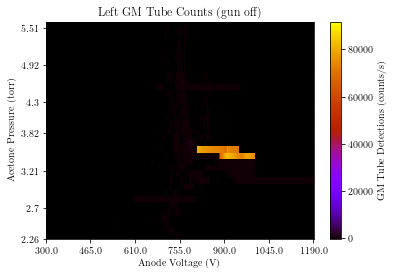

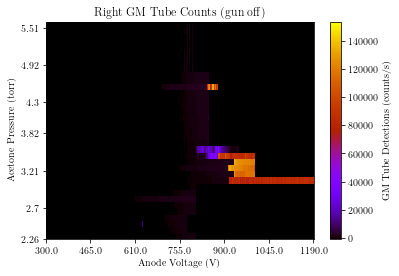

In [4]:
# left tube

LGMPlotOff = pd.DataFrame(columns=np.unique(LGMOff['Anode']), index=np.unique(LGMOff['Pressure'])) # reshapes the data in order to create a heatmap

for i in range(len(LGMOff['Pressure'])):
    LGMPlotOff.loc[LGMOff['Pressure'][i], LGMOff['Anode'][i]] = float(LGMOff['Counts'][i])

LGMPlotOff = LGMPlotOff.fillna(0.)

fig1, ax1 = plt.subplots()
ax1.pcolormesh(LGMPlotOff, cmap='gnuplot', vmin=-1/256*max(LGMOff['Counts']), vmax=max(LGMOff['Counts']))

ax1.yaxis.set_ticks(np.linspace(0, len(LGMPlotOff.index)-1, 7, dtype='int'))
ylabels = []
for i in np.linspace(0, len(LGMPlotOff.index)-1, 7, dtype='int'):
    ylabels.append(LGMPlotOff.index[i])
ax1.yaxis.set_ticklabels(ylabels)
ax1.set_ylabel('Acetone Pressure (torr)')

ax1.xaxis.set_ticks(np.linspace(0, len(LGMPlotOff.columns)-1, 7, dtype='int'))
xlabels = []
for i in np.linspace(0, len(LGMPlotOff.columns)-1, 7, dtype='int'):
    xlabels.append(LGMPlotOff.columns[i])
ax1.xaxis.set_ticklabels(xlabels)
ax1.set_xlabel('Anode Voltage (V)')

ax1.set_title('Left GM Tube Counts (gun off)')

cbar1 = fig1.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=-1/256*max(LGMOn['Counts']), vmax=max(LGMOn['Counts'])), cmap='gnuplot'))
cbar1.set_label('GM Tube Detections (counts/s)')
fig1.savefig('Plots/LGMGunOff.jpg', dpi=500)
plt.show()

# right tube

RGMPlotOff = pd.DataFrame(columns=np.unique(RGMOff['Anode']), index=np.unique(RGMOff['Pressure'])) # reshapes the data in order to create a heatmap

for i in range(len(RGMOff['Pressure'])):
    RGMPlotOff.loc[RGMOff['Pressure'][i], RGMOff['Anode'][i]] = float(RGMOff['Counts'][i])

RGMPlotOff = RGMPlotOff.fillna(0.)

fig2, ax2 = plt.subplots()
ax2.pcolormesh(RGMPlotOff, cmap='gnuplot', vmin=-1/256*max(RGMOff['Counts']), vmax=max(RGMOff['Counts']))

ax2.yaxis.set_ticks(np.linspace(0, len(RGMPlotOff.index)-1, 7, dtype='int'))
ylabels = []
for i in np.linspace(0, len(RGMPlotOff.index)-1, 7, dtype='int'):
    ylabels.append(RGMPlotOff.index[i])
ax2.yaxis.set_ticklabels(ylabels)
ax2.set_ylabel('Acetone Pressure (torr)')

ax2.xaxis.set_ticks(np.linspace(0, len(RGMPlotOff.columns)-1, 7, dtype='int'))
xlabels = []
for i in np.linspace(0, len(RGMPlotOff.columns)-1, 7, dtype='int'):
    xlabels.append(RGMPlotOff.columns[i])
ax2.xaxis.set_ticklabels(xlabels)
ax2.set_xlabel('Anode Voltage (V)')

ax2.set_title('Right GM Tube Counts (gun off)')

cbar2 = fig2.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=-1/256*max(RGMOff['Counts']), vmax=max(RGMOff['Counts'])), cmap='gnuplot'))
cbar2.set_label('GM Tube Detections (counts/s)')
fig2.savefig('Plots/RGMGunOff.jpg', dpi=500)
plt.show()

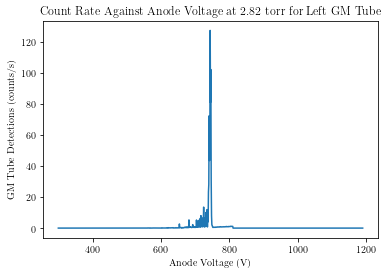

In [9]:
fig, ax = plt.subplots()
ax.plot(LGMPlotOff.loc[2.82, :])
ax.set_ylabel('GM Tube Detections (counts/s)')
ax.set_xlabel('Anode Voltage (V)')
ax.set_title('Count Rate Against Anode Voltage at 2.82 torr for Left GM Tube')
plt.savefig('Plots/example.jpg', dpi=500)
plt.show()